## Mod 2 Project Submission

* Student name: Andro Tikvica
* Student pace: Self-Paced
* Scheduled project review date/time: Tuesday, December 22, 2020 15:30
* Instructor name: Jeff Herman
* Blog post URL: https://zuchini1234.github.io/module_2_project_-_king_county_business_case 


## Introduction

### Objective

As a real estate consultancy, we deal with various clients and problems and our primary obligation is to understand the housing market. We cover the entirety of King County, Washington and aim to provide a comprehensive resolution to whatever requests our clients might make. Here are several questions that we have worked through as a firm to both bolster our understanding of the area and to facilitate customer requests.

**Question 1**

With which single feature of a property is it easiest to guess the value of a property?

We will not always have access to our data team and it is vital that we are able to gain as much insight from as little information as possible. 

**Question 2**

A buyer approaches the firm looking for advice on purchasing a property against the following criteria
 - Minimum two bed
 - No real restriction on price
 - Plan to resell within a period of five years and wants a healthy profit
 - Buyer is prepared to invest in property.
 
 The aim here is to identify features and areas where there is most likely to be an increase in price over the near term. This may include recommending properties that could easily be upgraded 

**Question 3**

A real estate developer approaches the firm looking to expand into King County. What advice would you give them? How could they best realize a healthy profit with the insights this dataset offers? This developer is aimed at identifying cheaper opportunities and investing larger sums of money into long term development. 
   
What areas and properties can we identify that would satisfy those criteria?

**But before we get to looking at these questions, can we create as accurate as possible, an equation for predicting house prices in King County based on features?**


### Outline

This jupyter notebook will be split into five main sections using the OSEMiN Data Science Workflow:

**1. Obtain** - This will include importing the data and inspecting it in its raw format. 

**2. Scrub** - Cleaning the data: filling missing values, changing data types and fixing any other issues with the data.

**3. Explore** - Conduct Exploratory Data Analysis. Much of what we find in this step will form part of Data Cleaning and Preprocessing.

**4. Model** - Here we will build a predictive model using linear regression. 

**5. Interpret** - What did we find and how confident can we be in those findings?


## 1. Obtain - Data Load and Inspection


#### Import Packages

In [1]:
# Data Cleaning, Preparation, and Visualization
import numpy as np # for numbers and stuff
import pandas as pd # for creating and manipulating tables
import datetime # to convert strings to datetime
pd.set_option('display.max_rows', None) # to extend the number of rows that show in a data frame
import matplotlib.pyplot as plt # for creating visualizations
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # to simplify complex visualizations
sns.set(style="white") # uses a minimalist backdrop for sns plots

# Statistical Packages
from scipy import stats # to calculate zscore to remove outliers
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression # To initiate a linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from itertools import combinations # Used for Interactions
from statsmodels.stats.diagnostic import het_goldfeldquandt


# Map package for mapping (literally) our data
import folium
from folium.plugins import HeatMap

# Filter out any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset in as a Pandas Dataframe
kc = pd.read_csv("kc_house_data.csv")
# Make sure that all columns will be shown
pd.set_option('display.max_columns', None)
# Display first five lines of the dataframe
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Column Names and descriptions for Kings County Data Set
* **id** - unique identifier for a house (May appear multiple times if that house is sold multiple times within the dataset)
* **dateDate** - Date of Sale (format: mm/dd/yyyy)
* **pricePrice** -  Price of Sale (Dependent Variable)
* **bedroomsNumber** -  Number of Bedrooms
* **bathroomsNumber** -  Number of bathrooms
* **sqft_livingsquare** -  Total square footage of living space
* **sqft_lotsquare** -  Total square footage of the lot
* **floorsTotal** -  Number of floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Rating of the property's view on a scale from 0 to 5
* **condition** - How good the condition is (Overall) on a scale of 1 to 5
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year Built
* **yr_renovated** - Year when house was renovated, 0.0 if never renovated
* **zipcode** - Zipcode of the Property
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
# Look at what datatypes and the amount of null values we will be working with
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Show the number of unique values in each column
kc.nunique()
# This will form part of the variable split in the next section
# There are, apparently, some doubles because there are fewer unique id's than total rows

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
# Checking the duplicate ID's. Only printing the highest for succinctness
print(kc['id'].value_counts()[:1])
# Check the instance with the highest number of repetitions
kc.loc[kc['id'] == 795000620]
# These are not duplicates but rather multiple sales of the same house
# Therefore date is date of sale

795000620    3
Name: id, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


#### Our Variables

Dependent Variable: Sale Price

Independent Vasriables: Everything else excluding "id"

## 2. Scrub -  Data Cleaning

I also want to make a note of the fact that I am aware that I could have downloaded the dataset fresh from Kaggle and avoided doing a portion of this cleaning, but I appreciate the challenge and recognize the iportance of being able to recognize discrepancies in the data you are working with. *pats self on the back

In [6]:
kc_clean = kc.copy()

# Drop NaN values from 'view'
kc_clean.dropna(axis = 0, subset = ['view'], inplace = True)

# Change view column to int, it is a range of 0 to 5 only using whole  numbers
kc_clean["view"] = kc_clean["view"].map(lambda x: int(x))

# Drop rows where sqft_basement == ?
sqft_basement_to_drop = kc_clean['sqft_basement'].loc[kc_clean['sqft_basement'] == "?"].index
kc_clean.drop(labels = sqft_basement_to_drop, inplace = True)

# 60% of houses have no basement - convert to binary - n.b. input is string
kc_clean['basement'] = kc_clean['sqft_basement'].map(lambda x: 0 if x == "0.0" else 1)
kc_clean.drop('sqft_basement', axis = 1, inplace = True)

# Fill remaining NaN with 0.0; only waterfront and yr_renovated are left with NaN both of which use 0 to signify that the answer is negative making this solution appropriate
kc_clean.fillna(0.0, inplace = True)

# Change date to datetime so its usable 
kc_clean['date'] = kc_clean['date'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Change various columns to int for ease of operation
for i in ['price', 'waterfront', 'yr_renovated']:
    kc_clean[i] = kc_clean[i]. map(lambda x: int(float(x)))
    
# Dropping outlier for bedrooms: 33 bedrooms when the next highest is 
kc_clean.drop(15856, inplace = True)

# Drop id, it will serve no purpose
kc_clean.drop("id", axis = 1, inplace = True)

# bathrooms, floors, lat, and long have to stay as float as they utilize decimal poimts in a significant manner
# Check that it was succesful with .info() - Not shown here
kc_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,1
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0


In [7]:
kc_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
count,2.108100e+04,21081.000000,21081.000000,21081.000000,2.108100e+04,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000
mean,5.402422e+05,3.370998,2.115934,2080.381813,1.507802e+04,1.493644,0.006688,0.233338,3.409753,7.657749,1789.035530,1971.024477,68.362601,98077.857644,47.560365,-122.213838,1986.948579,12732.895166,0.392913
std,3.667404e+05,0.902228,0.768156,917.872690,4.117431e+04,0.539372,0.081511,0.765083,0.650520,1.173709,828.372939,29.323349,363.037878,53.529758,0.138569,0.140608,685.545579,27149.369147,0.488409
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10089.000000,1.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


## 3. Exploratory Data Analysis - Preprocessing

Now that the data is cleaned and usable throughout, it is time to apply statistical and mathematical processes to gain insight into the relationships of the data and to determine which avenues are likely to offer the best insights. 

This section has elements of the second and third step of OSEMiN but I have separated it out as I find it to be the intersection between the two categories, having elements of both. I do not think it is purely exploratory as the data will be cleaned and cut based on the information found, and neither do i think normalization and one-hot encoding falls within either of the categories alone. 

**Mapping our Data**

Let's first take a look at a heatmap of which areas we will be working with in King County. We used the uncleaned dataset to maximize the available datapoints and to see where the most expensive house of all is. Clearly there is a concentration around the Seattle area and the most expensive house is around there too. This is however, more of a familiarization tool than something that drives any insight. If you zoom in on the map you can see more accurately where the houses on our dataset are most concentrated. 

In [8]:
# find the row of the house which has the highest price
maxpr=kc.loc[kc['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = kc.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

**Preparing Data for Linear Regression**

There are five key assumptions that need to be met to perform a linear regression:

* Linear Relationship - Addressed above with jointplots above. 
* Normality - Addressed above with boxplots
* No or little Multicollinearity - Addressed above in preprocessing
* No auto-correlation - Durbin-Watson test in each model will indicate autocorrelation. Generally a score between 1.5 and 2.5 indicates no autocorrelation.
* Homoscedasticity - The residuals are equally spread around the regression line, will be checked for each model

Additionally, Linear Regression requires at least twenty samples per independent variable which is easily met here. 


### Multicollinearity

Multicollinearity occurs when two or more independent variables are highly linearly correlatied possibly undermining the significance of these independent variables. This may cause the multiple regression to change erratically with small changes in the data. Below we will use a Pearson Correlation Matrix through seaborn's heatmap function to see whether and of the numerical features of this dataset are highly correlated

We will idnetify variables that will be removed now to avoid doing work on variables that will eventually be removed.

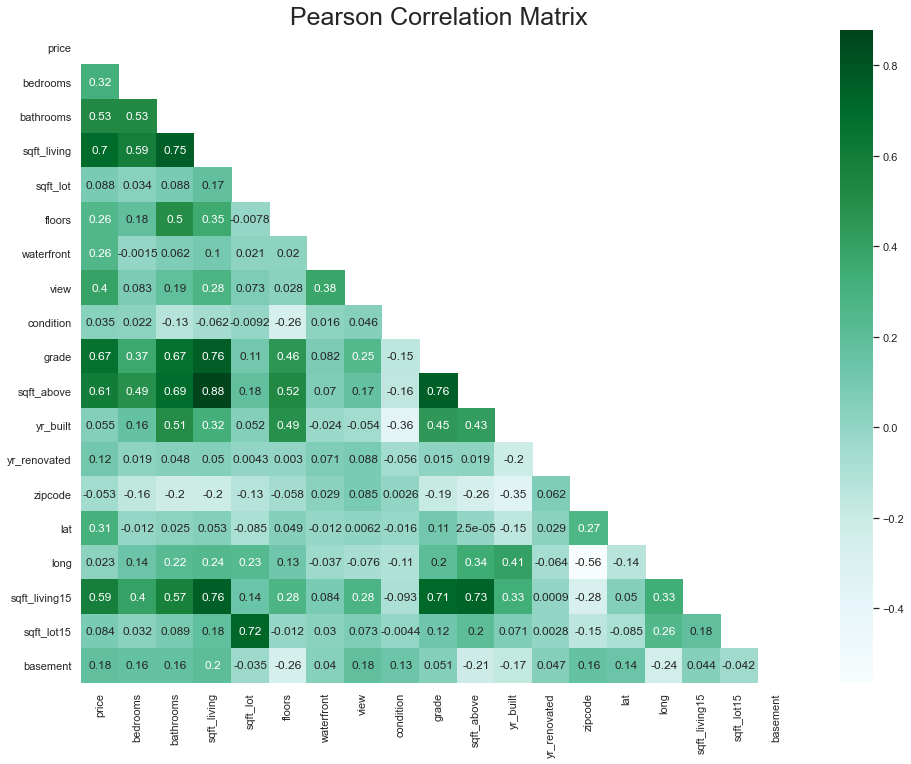

In [9]:
features = [i for i in kc_clean.columns[1:]]

mask = np.zeros_like(kc_clean[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kc_clean[features].corr(),annot=True, cmap='BuGn', 
            linecolor="w", mask = mask)

Based on the chart there are a few standout correlations that indicate multicollinearity and we need to consider:

**sqft_living15 w/ sqft_living, and sqft_lot15 w/ sqft_lot** - 
These both have a correlation higher than .7 as it seems that most houses can be found near similarly sized houses, so these two categories will be removed in favor of keeping sqft_living.

**sqft_above w/ sqft_living** - .88 correlation is very high and sqft_above will be removed as it only represents a portion of the sqft_living measurement.

**bathrooms w/ multiple features** - bathrooms will be dropped as it has multiple correlations of higher than .5. Furthermore I see this as a valid point to slim down the features we are comparing for the sake of limiting features.

Features to Drop = "sqft_above", "bathrooms", "sqft_living15", "sqft_lot15"

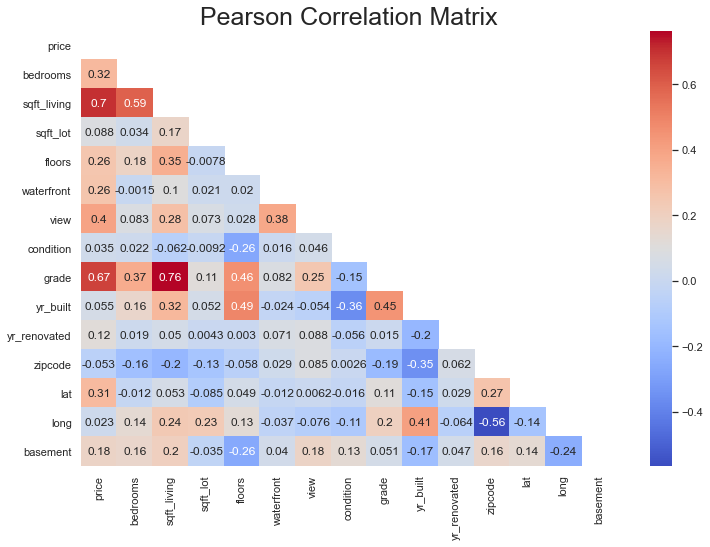

In [10]:
new_features = features.copy()
[new_features.remove(i) for i in ['sqft_living15', 'sqft_lot15', 'bathrooms', 'sqft_above']]

mask = np.zeros_like(kc_clean[new_features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kc_clean[new_features].corr(),annot=True, cmap='coolwarm', 
            linecolor="w", mask = mask)

#### What We Found

Here is a redone Pearson Correlation Matrix from Seaborn with a different color palette. Based on this information I assume that sqft_living and grade will be most determinant of these categories.  

For tips on how to work with heatmaps in seaborn (like cutting the top half off) I used this link: https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f a lot of good material on there. And in terms of colorcodes, just play around with them till you find something that looks normal. 

In [11]:
# New df without these variables
kc_filter = kc_clean.copy()

# Drop multicollinear variables
kc_filter.drop(["sqft_above", "bathrooms", "sqft_living15", "sqft_lot15"], axis = 1, inplace = True)

**Visualization Techniques - Joint Plots and Boxplots**

Joint plots, from Seaborn, allow us to visualize a scatterplot of different independent variables against price while showing a Kernel Density Estimation for both variables in the margins and a simple linear regression. Boxplots will be used for categorical variables to determine the distribution of data against price

Unfortunately, as sns.jointplot does not take an axes argument, each of these joint plots will have to be printed out one after the other and may take up a large portion of your screen, but the insight they offer will be vital for this project.

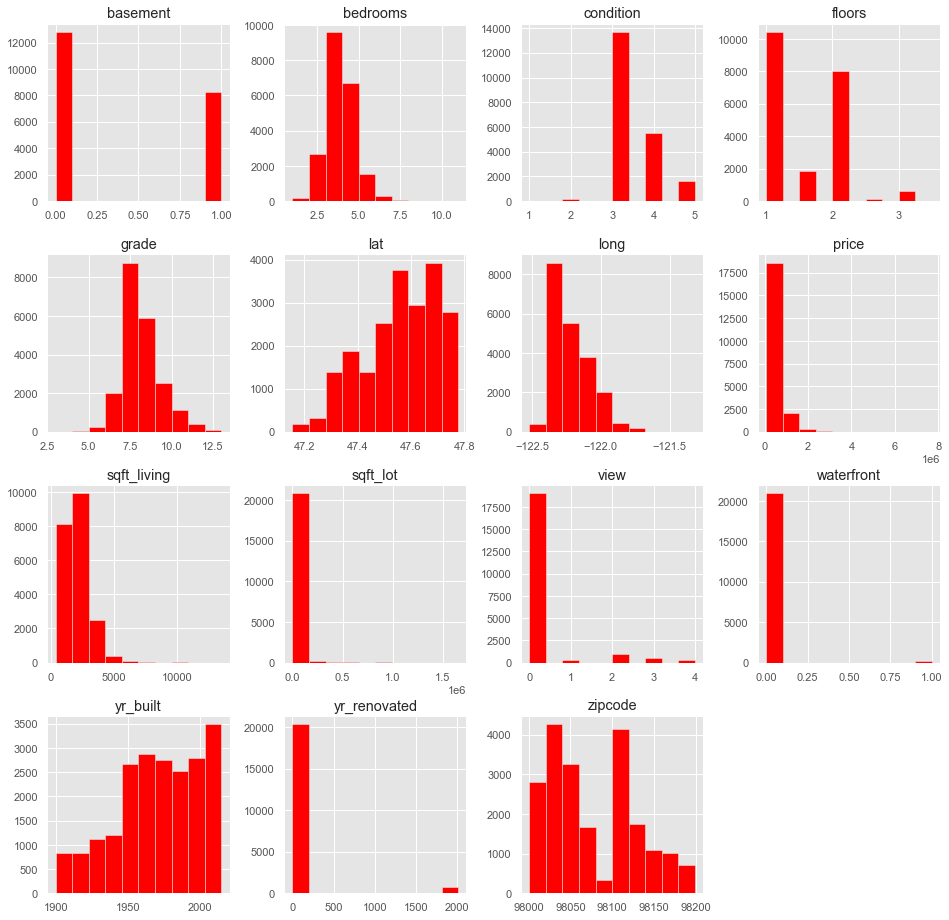

In [12]:
# Visualize data
plt.style.use('ggplot')
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
kc_filter.hist(ax = ax, color = 'red');

A lot of the continuous variables exhibit non-normal distribution, this needs to be addresed to ensure accurate modeling. To do so we will be doing some Feature Selection

### Feature Selection - Continuous Data

To normalize the data used, we will be cutting parts of the data that skew the distribution. While this reduces the total samples that will go into the model, it will increase interpratability for the customers in question as they are looking for properties that are less MTV Cribs and have room for increasing value.

In [13]:
# Create a function that will return a jointplot and a boxplot of each variable.
def box_joint(ind, df):
    print(f"{ind} vs price")
    # plotted independent continuous variable against price, set the height to be a little smaller (all jointplots are square)
    sns.jointplot(ind, 'price', data = df, kind = 'reg', height = 5,
                 joint_kws={'line_kws':{'color':'cyan'}})
    plt.show()
    df[ind].hist()
    plt.show()

Before
sqft_living vs price


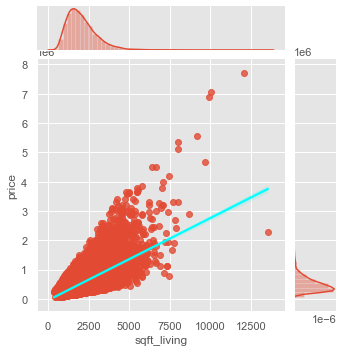

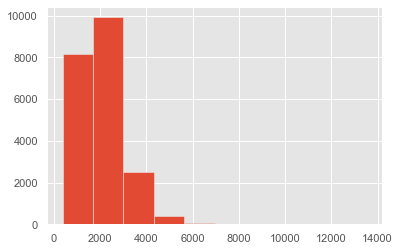

After
sqft_living vs price


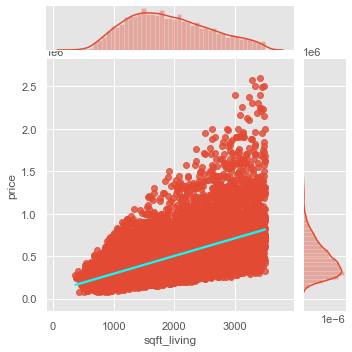

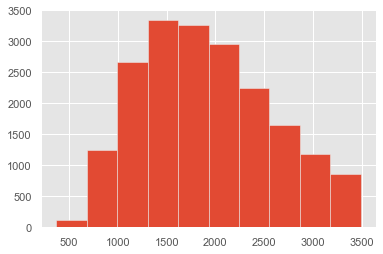

In [14]:
# Before
print("Before")
box_joint('sqft_living', kc_filter)

# Limit to 4000 sqft
kc_filter = kc_filter[kc_filter['sqft_living']<3500]

# Check whether distribution improved
print("After")
box_joint('sqft_living', kc_filter)

# Much better

Before
bedrooms vs price


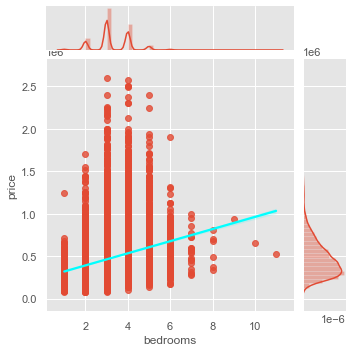

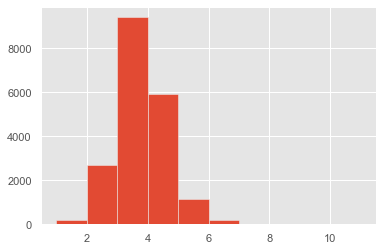

After
bedrooms vs price


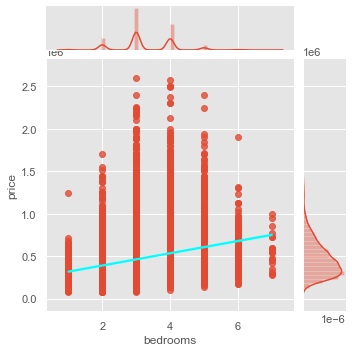

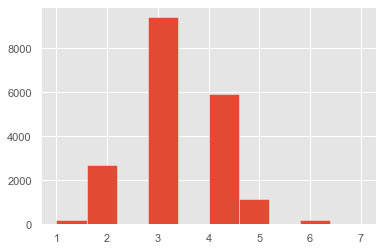

In [15]:
# Much like above except we will work with the new filtered df each turn
print("Before")
box_joint('bedrooms', kc_filter)

# Limit to 7 or fewer beds
kc_filter = kc_filter[kc_filter['bedrooms'] < 8]

# Check whether distribution improved
print("After")
box_joint('bedrooms', kc_filter)

Before
sqft_lot vs price


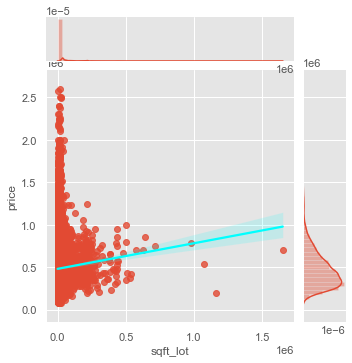

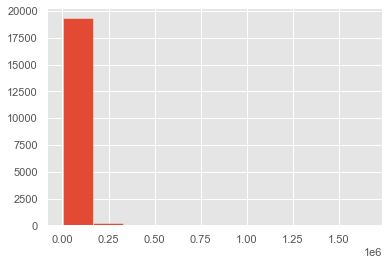

After
sqft_lot vs price


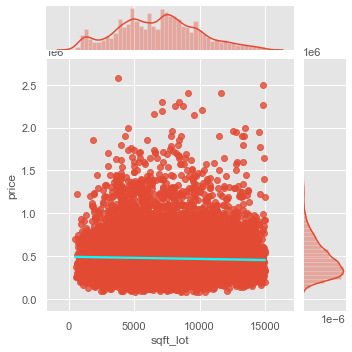

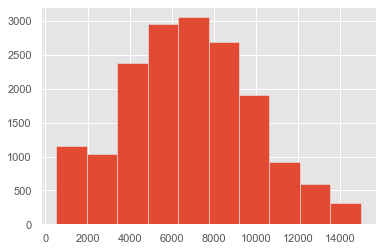

In [16]:
# sqft_lot
print("Before")
box_joint('sqft_lot', kc_filter)

# Limit to 17,500 sqft
kc_filter = kc_filter[kc_filter['sqft_lot'] < 15000]

# Check whether distribution improved
print("After")
box_joint('sqft_lot', kc_filter)

Before


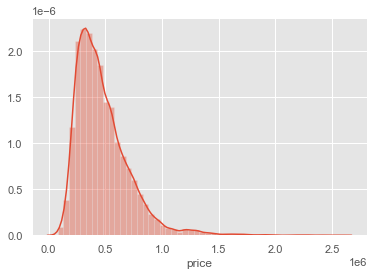

After


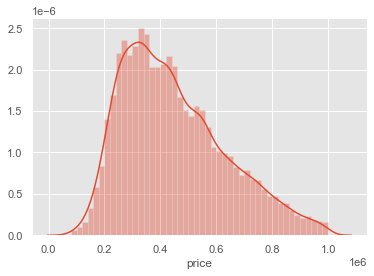

In [17]:
# Price
print("Before")
sns.distplot(kc_filter['price'])
plt.show()

# Limit to 
kc_filter = kc_filter[kc_filter['price'] < 1000000]

# Check whether distribution improved
print("After")
sns.distplot(kc_filter['price'])

In [18]:
# We managed to retain almost 17,000 of the samples
len(kc_filter)

16494

### Feature Selection - Categorical Data

**Binning**

There are too many dates in yr_built and yr_renovated - time for binning! Binning is the process of sepearting larger categorical groups into a smaller number of broader categories.

Bins are the upper and lower threshold of each label. In the first one, the bins were also used as the labels (minus the upper limit as there has to be one fewer label tham bin). For the second one, the first bin is -1 to include all the 0 values in the dataset.

In [19]:
# yr_built
bins = [1900,1910,1920,1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
kc_filter['year_built'] = pd.cut(kc_filter['yr_built'], bins = bins, labels = bins[:-1])

# yr_renovated
bins = [-1,1900,1910,1920,1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12]
kc_filter['year_renovated'] = pd.cut(kc_filter['yr_renovated'], bins = bins, labels = labels)

# Bin sale month
kc_filter['mo_sold'] = kc_filter['date'].map(lambda x: x.month)

# Bin sale year (only two years here)
kc_filter['yr_sold'] = kc_filter['date'].map(lambda x: x.year)

# Drop the original columns
kc_filter.drop(['date', 'yr_built', 'yr_renovated'], axis=1, inplace = True)

kc_filter.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,basement,year_built,year_renovated,mo_sold,yr_sold
0,221900,3,1180,5650,1.0,0,0,3,7,98178,47.5112,-122.257,0,1950,0,10,2014
1,538000,3,2570,7242,2.0,0,0,3,7,98125,47.7210,-122.319,1,1950,10,12,2014
2,180000,2,770,10000,1.0,0,0,3,6,98028,47.7379,-122.233,0,1930,0,2,2015
3,604000,4,1960,5000,1.0,0,0,5,7,98136,47.5208,-122.393,1,1960,0,12,2014
4,510000,3,1680,8080,1.0,0,0,3,8,98074,47.6168,-122.045,0,1980,0,2,2015


**Binning Zipcodes**

I was finding it very difficult to seperate out the zipcodes based on area as they are not organized numerically. I stumbled upon a fellow Flatiron Data Science student's work on github that had them already seperated out! Link to their github (https://github.com/edwardcheng22/King-County-Housing-Prices-Prediction-Project). A veritable god send!

In [20]:
# Seattle, Shoreline, Lake Forest Park
A_zipcodes = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
B_zipcodes = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
C_zipcodes = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
D_zipcodes = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
E_zipcodes = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
F_zipcodes = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
G_zipcodes = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
H_zipcodes = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
I_zipcodes = [98065, 98045, 98024]

In [21]:
# Create a function that returns the letter corresponding to the area
def zipcode_generator(zipcode):
    # Had to use numbers so we could use the hue function in the scatter plot below
    identifiers = [1,2,3,4,5,6,7,8,9]
    groups = [A_zipcodes, B_zipcodes, C_zipcodes, D_zipcodes, E_zipcodes, 
              F_zipcodes, G_zipcodes, H_zipcodes, I_zipcodes]
    
    for n,i in enumerate(groups):
        if zipcode in i:
            return identifiers[n]

In [22]:
# Create a new column with only the area letter
kc_filter['area'] = kc_filter['zipcode'].map(zipcode_generator)

# Drop zipcodes
kc_filter.drop('zipcode', axis = 1, inplace = True)

kc_filter.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,basement,year_built,year_renovated,mo_sold,yr_sold,area
0,221900,3,1180,5650,1.0,0,0,3,7,47.5112,-122.257,0,1950,0,10,2014,4
1,538000,3,2570,7242,2.0,0,0,3,7,47.7210,-122.319,1,1950,10,12,2014,1
2,180000,2,770,10000,1.0,0,0,3,6,47.7379,-122.233,0,1930,0,2,2015,2
3,604000,4,1960,5000,1.0,0,0,5,7,47.5208,-122.393,1,1960,0,12,2014,1
4,510000,3,1680,8080,1.0,0,0,3,8,47.6168,-122.045,0,1980,0,2,2015,7


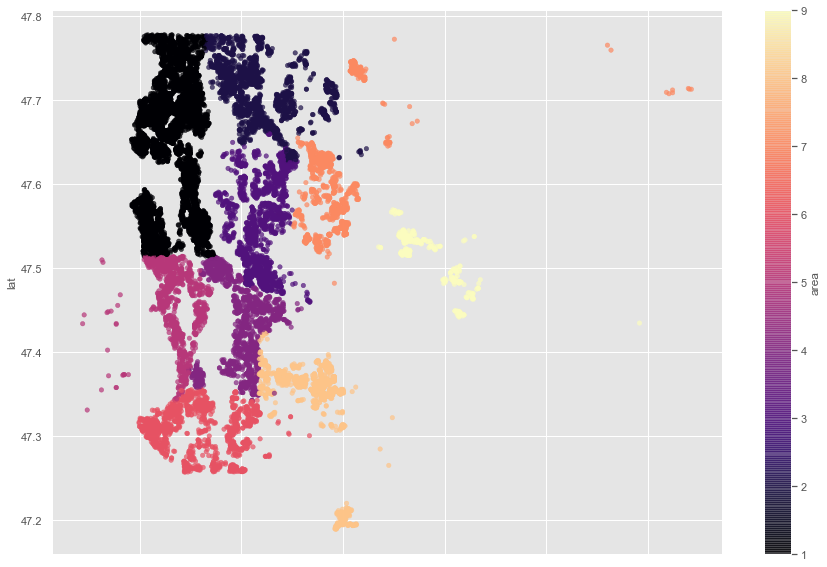

In [23]:
# map showing the different areas
kc_filter.plot.scatter('long', 'lat', c = 'area', alpha = 0.7,  figsize = (15, 10), cmap = 'magma')

**Boxplots for Categorical Data**

In [24]:
kc_filter.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,basement,year_built,year_renovated,mo_sold,yr_sold,area
0,221900,3,1180,5650,1.0,0,0,3,7,47.5112,-122.257,0,1950,0,10,2014,4
1,538000,3,2570,7242,2.0,0,0,3,7,47.7210,-122.319,1,1950,10,12,2014,1
2,180000,2,770,10000,1.0,0,0,3,6,47.7379,-122.233,0,1930,0,2,2015,2
3,604000,4,1960,5000,1.0,0,0,5,7,47.5208,-122.393,1,1960,0,12,2014,1
4,510000,3,1680,8080,1.0,0,0,3,8,47.6168,-122.045,0,1980,0,2,2015,7


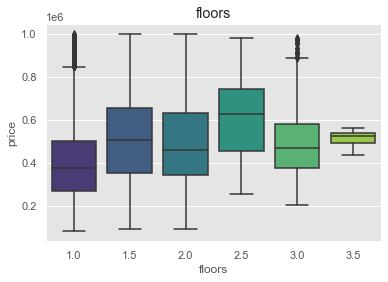

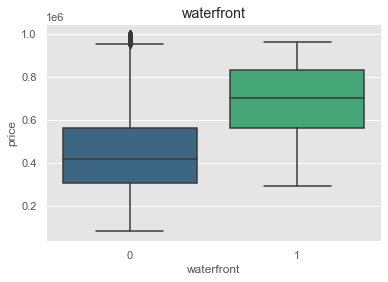

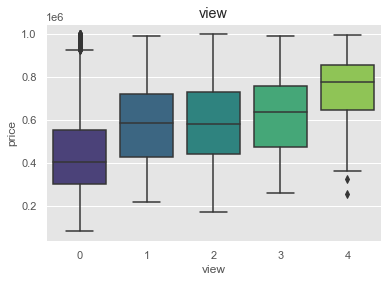

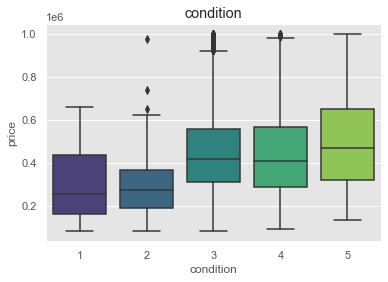

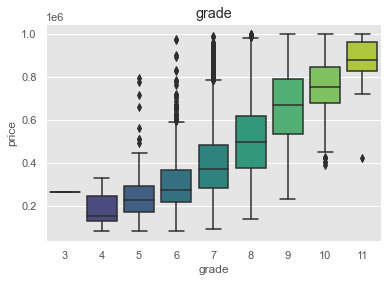

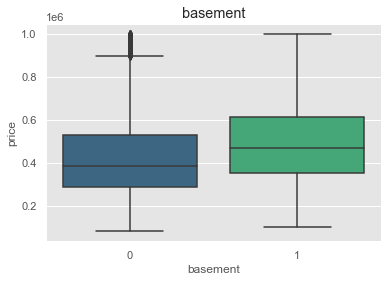

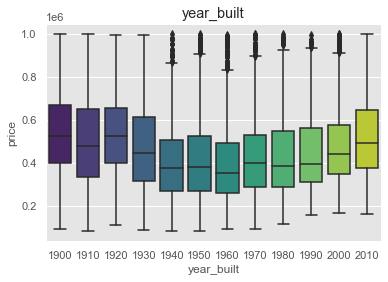

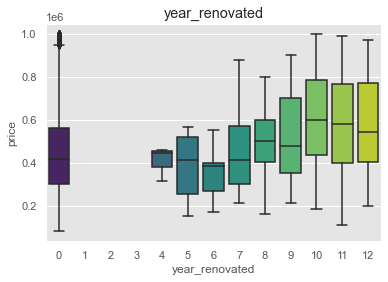

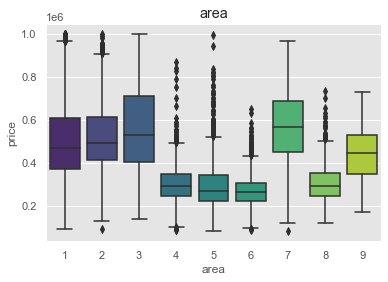

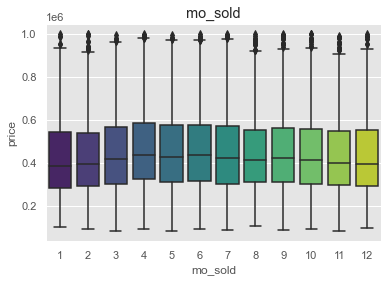

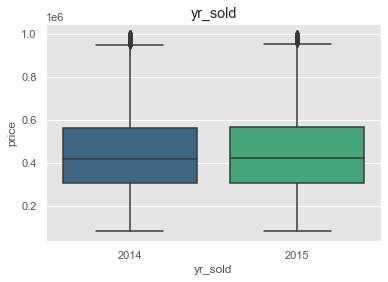

In [25]:
cats = ['floors', 'waterfront', 'view', 'condition', 'grade', 'basement', 
        'year_built', 'year_renovated', 'area', 'mo_sold', 'yr_sold']

for n, i in enumerate(cats): 
        plt.figure(n)
        plt.title(i)
        sns.boxplot(x = i, y = 'price', data = kc_filter, palette = 'viridis');

Year sold appears to be the least important, and it is to be expected as the dataset covers only two years.

Floors was also retrospectively removed, doing so improved the model accuracy

In [26]:
kc_filter.drop(['yr_sold', 'floors'], axis = 1, inplace = True)
cats.remove('floors')

# Save a version of the dataframe before ohe
kc_base = kc_filter.copy()

### Question 1: 

Before we one-hot encode, lets look at our first question.

**With which single feature is it the easiest to predict House Prices in King County, Washington?**

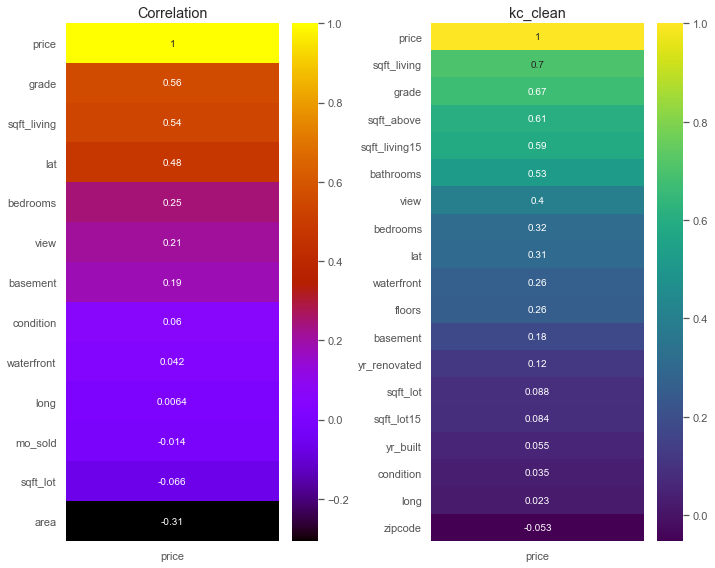

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))

# Correlation using kc_filter
correlation = kc_base.corr()
corr_model = pd.DataFrame(correlation['price'])
corr_model.sort_values('price', ascending = False, inplace = True)
ax[0].set_title('Correlation')
sns.heatmap(corr_model, annot=True, cmap='gnuplot', ax = ax[0])

# Correlation using kc_clean
correlation1 = kc_clean.corr()
corr_model1 = pd.DataFrame(correlation1['price'])
corr_model1.sort_values('price', ascending = False, inplace = True)
ax[1].set_title('kc_clean')
sns.heatmap(corr_model1, annot = True, cmap='viridis', ax = ax[1])

fig.tight_layout()

**Building Grade in kc_filter and Square Footage of Living Space in kc_clean**

We made two charts for both the cleaned kc_clean df and the curated kc_filter. For both, the two best features are grade and sqft_living. However, as we are focused more on the properties that can be foudn in the kc_filter df we will be choosing grade as our answer. The second heatmap was aimed at verifying the results. 

The single feature that has the highest correlation with price is the Grade of the property. This is, followed by sqft_living which one would have expected to be in first place. This is most likely due to the specifics of the Building Grade requirements in King County.

1. Falls short of minimum building standards. Normally cabin or inferior structure.

2. ibid.

3. ibid.

4.  Generally older, low quality construction. Does not meet code.

5. Low construction costs and workmanship. Small, simple design.

6. Lowest grade currently meeting building code. Low quality materials and simple designs.

7. Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8. Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9. Better architectural design with extra interior and exterior design and quality.

10. Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11. Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12. Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13. Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

The criteria are not solely linked to the quality of construction, but also deisgn making it highly likely that the more money was put into a house, the higher grade it would receive and the higher its sale price/ value would be.

The Sqaure footage of living area is directly behind, making an almost imperceptably worse feature with which to guess the value of a property. However, because of the multicolinearity present between grade and sqft_living, the two features are near identical in what they indicate of a property's price. i.e. as Grade goes up, so does square footage. In essence, both would have similar accuracy in guessing the property price. 

The business insight that can be gained from this, is that the easiest way to determine whether a property is being over or under priced is through the property's Grade.

### One Hot Encoding

Turn all the categorical variables into binary

In [28]:
# New list of variables to one-hot encode
to_ohe = cats.copy()
to_ohe.remove('yr_sold')

# Checking whether there are any variables with too many unique values that might need to be binned
kc_filter[to_ohe].nunique()

waterfront         2
view               5
condition          5
grade              9
basement           2
year_built        12
year_renovated    10
area               9
mo_sold           12
dtype: int64

In [29]:
# Function for one-hot encoding
def one_h_e(df, categories):
    
    df_ohe = df[categories].astype('category')
    
    df_ohe = pd.get_dummies(df_ohe, drop_first = True)
    
    df_done = pd.concat([df, df_ohe], axis = 1)
    
    df_done = df_done.drop(categories, axis = 1)
    
    return df_done

In [30]:
kc_filter = one_h_e(kc_filter, to_ohe)
kc_filter.head()

,price,bedrooms,sqft_living,sqft_lot,lat,long,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,basement_1,year_built_1910,year_built_1920,year_built_1930,year_built_1940,year_built_1950,year_built_1960,year_built_1970,year_built_1980,year_built_1990,year_built_2000,year_built_2010,year_renovated_1,year_renovated_2,year_renovated_3,year_renovated_4,year_renovated_5,year_renovated_6,year_renovated_7,year_renovated_8,year_renovated_9,year_renovated_10,year_renovated_11,year_renovated_12,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
0,221900,3,1180,5650,47.5112,-122.257,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000,3,2570,7242,47.7210,-122.319,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000,2,770,10000,47.7379,-122.233,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000,4,1960,5000,47.5208,-122.393,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000,3,1680,8080,47.6168,-122.045,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


**Save progress as .csv**

In [31]:
# Create a copy of the filtered df
preprocessed = kc_filter.copy()

# Save this dataframe to avoid running all the code above
preprocessed.to_csv('./data/preprocessed.csv')

In [32]:
preprocessed.head()

,price,bedrooms,sqft_living,sqft_lot,lat,long,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,basement_1,year_built_1910,year_built_1920,year_built_1930,year_built_1940,year_built_1950,year_built_1960,year_built_1970,year_built_1980,year_built_1990,year_built_2000,year_built_2010,year_renovated_1,year_renovated_2,year_renovated_3,year_renovated_4,year_renovated_5,year_renovated_6,year_renovated_7,year_renovated_8,year_renovated_9,year_renovated_10,year_renovated_11,year_renovated_12,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
0,221900,3,1180,5650,47.5112,-122.257,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000,3,2570,7242,47.7210,-122.319,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000,2,770,10000,47.7379,-122.233,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000,4,1960,5000,47.5208,-122.393,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000,3,1680,8080,47.6168,-122.045,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


Let's see how the new preprocessed dataset looks on a scatterplot that shows price as well. You can clearly see that there is a concentration of high value properties in an around the central Seattle area, slowly getting more affordable as we move away from it. 

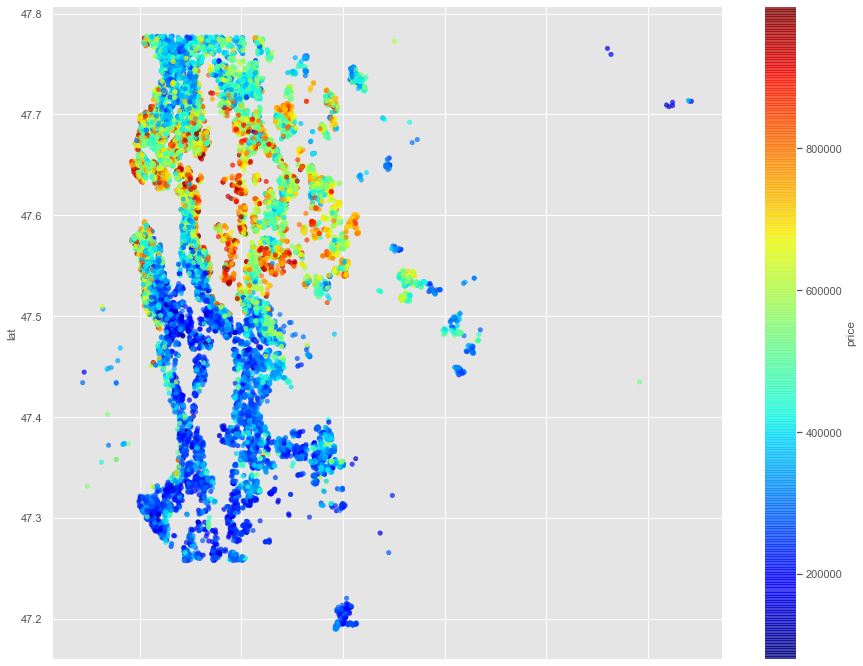

In [33]:
# Map of data using latitude and longitude
preprocessed.plot.scatter('long', 'lat', c = 'price', alpha = 0.7,  figsize = (15, 12), cmap = 'jet')
plt.savefig("Images/Price_Map")

## 4. Model  - Linear Regression



To avoid copy and pasting the code for each model, we will create a function that returns the main elements of a model.

**Train-Test Split -**
To make sure that we are not over or underfitting our regression models, we have to seperate the data into two portions. The first consists of the majority of the data and will be used to train the linear regression. This can range between 70 and 85 percent, but in this instance we have chosen 75%. The data has sufficient data points that I am comfortable choosing a smaller training portion. The train and test splits will then be concated into new dataframes

In [34]:
def linear_reg(df):
    
    # Split independent and dependent variables
    X = df.drop('price', axis = 1)
    y = df['price']
    
    # Split both into 75/25 train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size = 0.75, random_state = 12)
    
    # Create a new training set Dataframe w/ features and target
    kc_train = pd.concat([X_train, y_train], axis = 1)
    # Test Dataframe
    kc_test = pd.concat([X_test, y_test], axis = 1)
    
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    
    # Check the score (R-squared)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    
    # Designate input and outcome variables
    outcome = 'price'
    x_cols = [f"Q('{i}')" for i in X.columns]
    
    # Create a formula and use it to initiate an ols model 
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    smmodel = ols(formula = formula, data=kc_train).fit()
    print(smmodel.summary())
    
    # Test for Normality
    print("\nTest for Normality")
    fig = sm.graphics.qqplot(smmodel.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    # Remove the Q and parentheses from the x_cols object to allow using it with the dataframe
    x_cols_strip = [i.strip("Q()'") for i in x_cols]

    # plot the models homoscedasticity
    print("Test for Homoscedasticity")
    plt.scatter(smmodel.predict(kc_train[x_cols_strip]), smmodel.resid)
    plt.plot(smmodel.predict(kc_train[x_cols_strip]), [0 for i in range(len(kc_train))])
    plt.show()
    
    # plot the residuals distribution
    print("Test for Distribution of Residuals")
    sns.distplot(smmodel.resid)
    plt.show()
    
    return model, smmodel

### Model 1 - Preprocessed

Training Score: 0.72
Test Score: 0.7
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     510.6
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:37:56   Log-Likelihood:            -1.5985e+05
No. Observations:               12370   AIC:                         3.198e+05
Df Residuals:                   12308   BIC:                         3.203e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

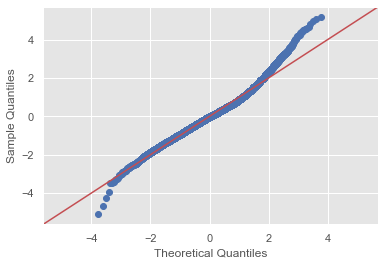

Test for Homoscedasticity


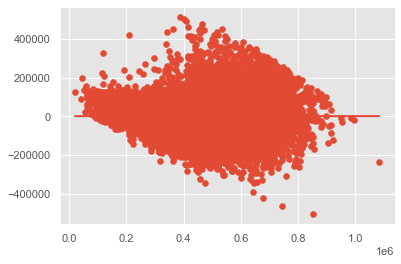

Test for Distribution of Residuals


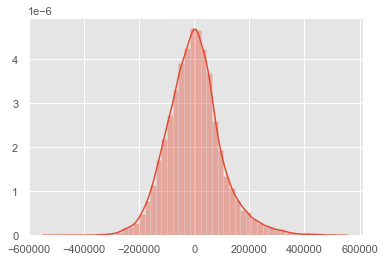

In [35]:
model1, smmodel1 = linear_reg(preprocessed)

#### Model 1 Summary

* **R-Squared:**
A score of .715 is fairly high, this model was pretty accurate at predicting house prices. Adjusted R-Squared was only slightly off (.714) indicating that the score was not only as a result of many features.

* **Normality:**
Residuals are not entirely normal, violatitng the assumption of normality. 

* **Homoscedasticity:**
Not bad

### Model 2 - Refining Model 1

For the second model we will be taking only the features from model 1 that have a p-value smaller than 0.05.

In [36]:
# Refine model using only features with p-value less than 0.05
p_table = smmodel1.summary().tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])

# Change datatype of p_value to float
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

#Initiate new list of columns names 
x_cols_refined = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols_refined))
# skipped the first one as it was "Intercept"
print(x_cols_refined)

66 53
['Intercept', "Q('bedrooms')", "Q('sqft_living')", "Q('sqft_lot')", "Q('lat')", "Q('long')", "Q('waterfront_1')", "Q('view_1')", "Q('view_2')", "Q('view_3')", "Q('view_4')", "Q('condition_3')", "Q('condition_4')", "Q('condition_5')", "Q('grade_4')", "Q('grade_5')", "Q('grade_6')", "Q('grade_7')", "Q('grade_8')", "Q('grade_9')", "Q('grade_10')", "Q('grade_11')", "Q('year_built_1920')", "Q('year_built_1930')", "Q('year_built_1940')", "Q('year_built_1950')", "Q('year_built_1960')", "Q('year_built_1970')", "Q('year_built_1980')", "Q('year_built_1990')", "Q('year_built_2000')", "Q('year_built_2010')", "Q('year_renovated_1')", "Q('year_renovated_2')", "Q('year_renovated_3')", "Q('year_renovated_6')", "Q('year_renovated_10')", "Q('year_renovated_11')", "Q('year_renovated_12')", "Q('area_2')", "Q('area_3')", "Q('area_4')", "Q('area_5')", "Q('area_6')", "Q('area_7')", "Q('area_8')", "Q('mo_sold_2')", "Q('mo_sold_3')", "Q('mo_sold_4')", "Q('mo_sold_5')", "Q('mo_sold_6')", "Q('mo_sold_7')",

Training Score: 0.72
Test Score: 0.7
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     648.6
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:37:58   Log-Likelihood:            -1.5986e+05
No. Observations:               12370   AIC:                         3.198e+05
Df Residuals:                   12321   BIC:                         3.202e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

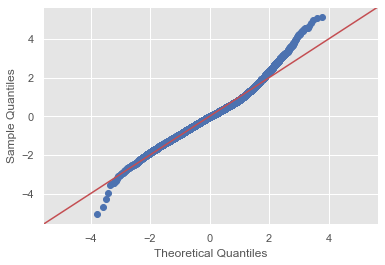

Test for Homoscedasticity


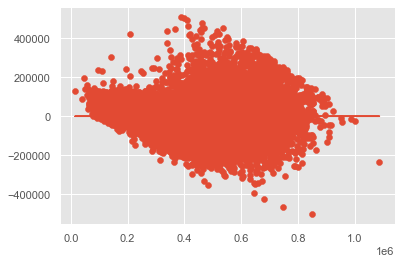

Test for Distribution of Residuals


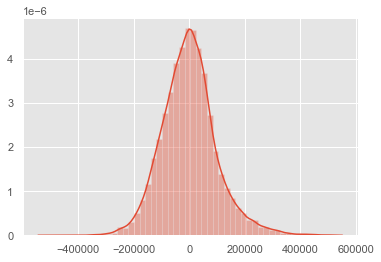

In [37]:
x_cols_strip = [i.strip("Q()'") for i in x_cols_refined]
x_cols_strip.append('price')

model2, smmodel2 = linear_reg(preprocessed[x_cols_strip[1:]])

#### Model 2 Summary

* **R-Squared:**
Actually .001 smaller on both the regular and adjusted R-Squared. However, considering that we removed more than twenty features. This is a fairly high figure, suggesting a relatively well fitted model.

* **Normality:**
Visually seems to be slightly better than model 1 but no material difference. 

* **Homoscedasticity:**
Similar to Model 1, but residuals are normally distributed (which is good).


### Model 3 - Preprocessed using Stepwise Selection


In [38]:
# This equation was copied from the curriculum
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(included[worst_feature])
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [39]:
def stepwise_linear_reg(df):
    
    # Split independent and dependent variables
    X = df.drop('price', axis = 1)
    y = df['price']
    
    # Split both into 75/25 train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size = 0.75, random_state = 12)
    
    # Create a new training set Dataframe w/ features and target
    kc_train = pd.concat([X_train, y_train], axis = 1)
    # Test Dataframe
    kc_test = pd.concat([X_test, y_test], axis = 1)
    
    # Select features using stepwise_selection
    result = stepwise_selection(X_train, y_train, verbose = False)
    print("Selected Features:")
    print(result)
    
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    
    # Check the score (R-squared)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    
    # Designate input and outcome variables
    outcome = 'price'
    x_cols = [f"Q('{i}')" for i in result]
    
    # Create a formula and use it to initiate an ols model 
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    smmodel = ols(formula = formula, data=kc_train).fit()
    print(smmodel.summary())
    
    # Test for Normality
    print("\nTest for Normality")
    fig = sm.graphics.qqplot(smmodel.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    # Remove the Q and parentheses from the x_cols object to allow using it with the dataframe
    x_cols_strip = [i.strip("Q()'") for i in x_cols]

    # plot the models homoscedasticity
    print("Test for Homoscedasticity")
    plt.scatter(smmodel.predict(kc_train[x_cols_strip]), smmodel.resid)
    plt.plot(smmodel.predict(kc_train[x_cols_strip]), [0 for i in range(len(kc_train))])
    plt.show()
    
    # plot the residuals distribution
    print("Test for Distribution of Residuals")
    sns.distplot(smmodel.resid)
    plt.show()
    
    return model, smmodel

Selected Features:
['sqft_living', 'area_6', 'area_4', 'area_8', 'area_5', 'grade_9', 'long', 'grade_10', 'grade_8', 'condition_3', 'grade_7', 'view_4', 'view_2', 'year_built_2000', 'grade_11', 'lat', 'view_3', 'year_built_1930', 'area_3', 'sqft_lot', 'mo_sold_4', 'view_1', 'year_built_1970', 'condition_5', 'mo_sold_3', 'year_renovated_11', 'year_built_1960', 'year_built_1990', 'year_built_1980', 'year_built_2010', 'year_built_1950', 'year_built_1940', 'condition_4', 'waterfront_1', 'grade_6', 'area_7', 'area_2', 'year_renovated_12', 'year_renovated_10', 'bedrooms', 'year_renovated_6']
Training Score: 0.72
Test Score: 0.7
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     757.8
Date:                Tue, 22 Dec 2020   Prob (F-statis

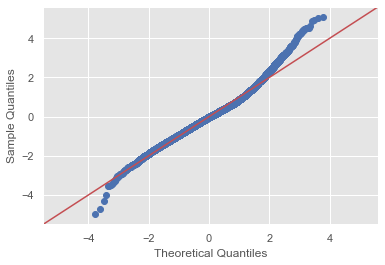

Test for Homoscedasticity


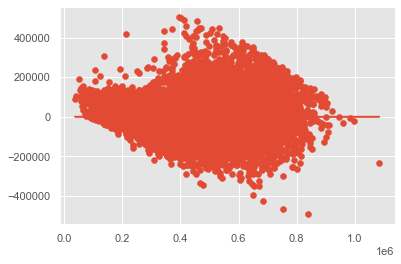

Test for Distribution of Residuals


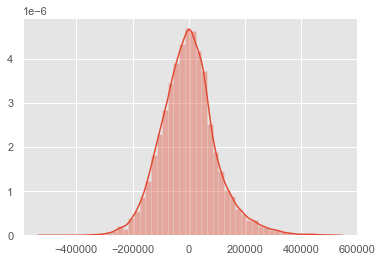

In [40]:
model3, smmodel3 = stepwise_linear_reg(preprocessed)

#### Model 3 Summary

* **R-Squared:**
No improvement on R-Squared

* **Normality:**
Acceptable degree of nromality 

* **Homoscedasticity:**
Homoscedasticity graph seems worse, but residual distribution is better

### Model 4 - Dealing with Interactions

In [41]:
kc4 = preprocessed.copy()

In [42]:
regression = LinearRegression()

# Split ind. and dependent vars
X = kc4.drop('price', axis=1)
y = kc4['price']

# Use cross validation to find baseline score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=14)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

print(baseline)

0.711186739470228


In [43]:
%%time
interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a,b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring = 'r2', cv = crossvalidation))
    if score > baseline:
        interactions.append((a,b, round(score,3)))

print(sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

[('lat', 'area_3', 0.733), ('lat', 'area_2', 0.725), ('sqft_living', 'lat', 0.718)]
Wall time: 16min 8s


So we do not have to run the cell above again (It took 16 mins!), the results were:
[('lat', 'area_3', 0.733), ('lat', 'area_2', 0.725), ('sqft_living', 'lat', 0.718)]

We will include all three interactions into our model.

Multicollinearity is expected with these features but does not need to be eliminated. 

In [44]:
kc4['lat_area_3'] = kc4['lat'] * kc4['area_3']
kc4['lat_area_2'] = kc4['lat'] * kc4['area_2']
kc4['lat_sqft_living'] = kc4['lat'] * kc4['sqft_living']

Training Score: 0.76
Test Score: 0.75
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     596.8
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:54:50   Log-Likelihood:            -1.5892e+05
No. Observations:               12370   AIC:                         3.180e+05
Df Residuals:                   12305   BIC:                         3.185e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

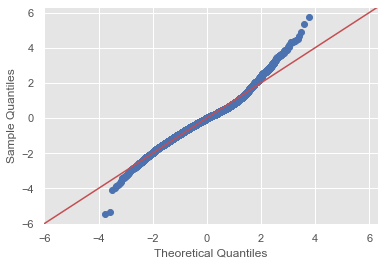

Test for Homoscedasticity


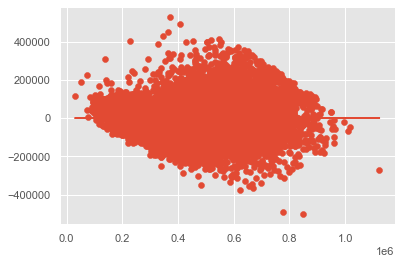

Test for Distribution of Residuals


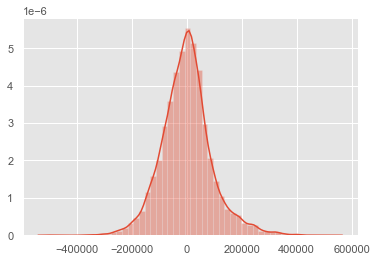

In [45]:
model4, smmodel4 = linear_reg(kc4)

### Model 5 - Final Model

Lets apply stepwise to this, to remove variables that do not contribute to the accuracy of the model. 

Selected Features:
['sqft_living', 'area_6', 'lat_sqft_living', 'area_4', 'grade_9', 'area_5', 'area_8', 'long', 'grade_8', 'grade_10', 'condition_3', 'year_built_1920', 'grade_7', 'view_4', 'year_built_1910', 'view_2', 'grade_11', 'lat_area_3', 'area_3', 'year_built_1930', 'view_3', 'lat', 'mo_sold_4', 'condition_5', 'view_1', 'mo_sold_3', 'sqft_lot', 'year_built_2000', 'year_built_1970', 'year_built_1960', 'condition_4', 'year_renovated_11', 'waterfront_1', 'year_built_1990', 'year_built_1950', 'year_built_1980', 'year_built_2010', 'year_built_1940', 'area_9', 'grade_6', 'year_renovated_12', 'bedrooms', 'year_renovated_10', 'area_2', 'lat_area_2', 'area_7', 'year_renovated_6', 'mo_sold_5']
Training Score: 0.76
Test Score: 0.75
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 

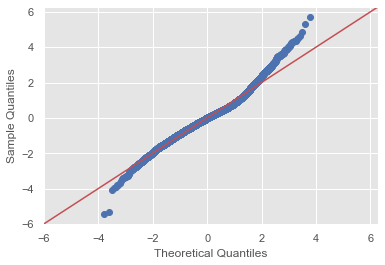

Test for Homoscedasticity


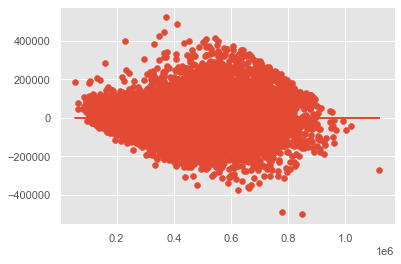

Test for Distribution of Residuals


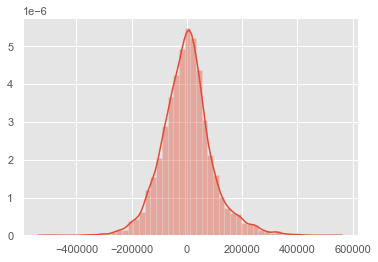

In [46]:
model5, smmodel5 = stepwise_linear_reg(kc4)

In [47]:
# Mathematical Test for Homoscedasticity
name = ['F statistic', 'p-value']
test = het_goldfeldquandt(smmodel5.resid, smmodel4.model.exog)
list(zip(name, test))

[('F statistic', 1.0200061809579262), ('p-value', 0.21922484643510107)]

With this p-value we are unable to reject the null hypothesis, indicating that the residuals are homoscedastic.

To avoid having to run all the code above, we will save the final model summary as an image.

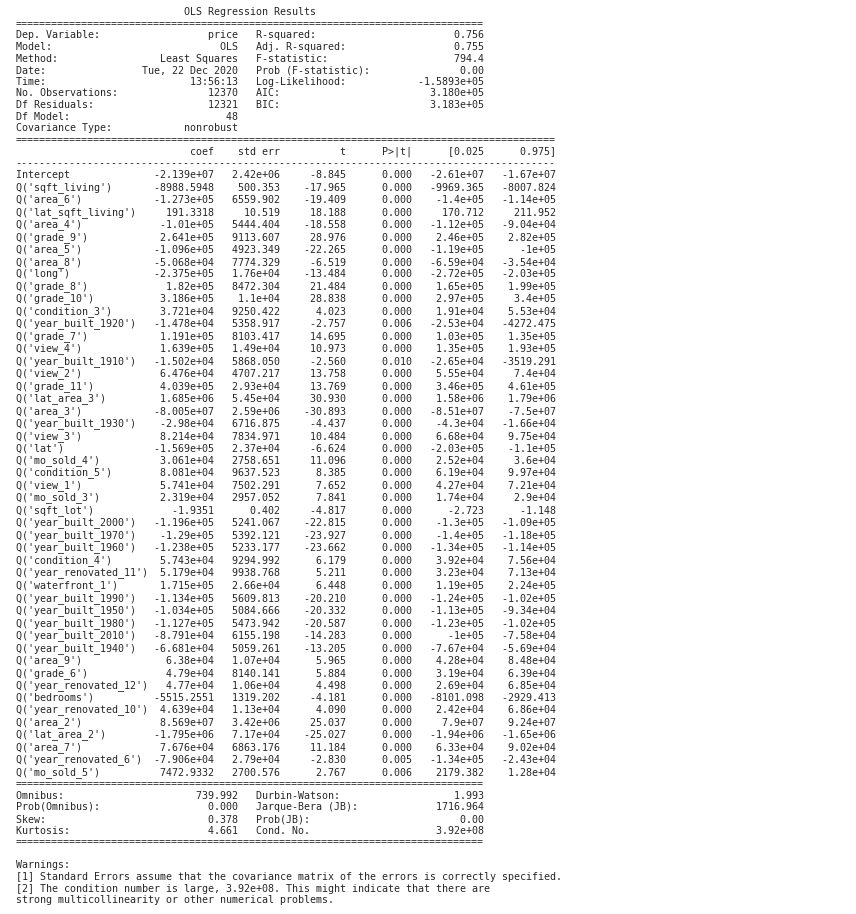

In [48]:
#Save model summary as image
plt.rc('figure', figsize=(12, 8))
plt.text(0.01, 0.05, str(smmodel5.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Images/FinalModel.png')

#### Model 5 Summary - The Final Model

* **R-Squared:**
An adjusted R-Squared of .755 is a very solid fit. 

* **Normality:**
While not entirely normal, the data is clearly, as a whole, quite normally distributed. 

* **Homoscedasticity:**
Residuals are fairly homoscedastic. 

This is our best model so far and will serve as our Final Model. This multiple linear regression analysis yielded the following results:

* **Adjusted R-Squared -** 0.755
* **F-statistic -** 596.8
* **P-Value** 0.00

In [49]:
model_coefficients = pd.DataFrame(smmodel5.params[1:], columns=['coefficients'])
print("Final Regression Formula\n")
for i in range(len(model_coefficients)):
    print(model_coefficients.coefficients[i], '*', model_coefficients.index[i], "+")
print(model5.intercept_)

Final Regression Formula

-8988.594752431298 * Q('sqft_living') +
-127323.07262632163 * Q('area_6') +
191.33176007944948 * Q('lat_sqft_living') +
-101035.2510672521 * Q('area_4') +
264076.11977767164 * Q('grade_9') +
-109619.880376757 * Q('area_5') +
-50677.25091035399 * Q('area_8') +
-237508.05229528516 * Q('long') +
182022.19055181008 * Q('grade_8') +
318604.7965301584 * Q('grade_10') +
37214.57031555388 * Q('condition_3') +
-14776.790851415604 * Q('year_built_1920') +
119077.51142776044 * Q('grade_7') +
163915.60725106674 * Q('view_4') +
-15021.58651093857 * Q('year_built_1910') +
64764.22192457235 * Q('view_2') +
403862.0278085903 * Q('grade_11') +
1685237.37185313 * Q('lat_area_3') +
-80049817.87222026 * Q('area_3') +
-29800.86683816996 * Q('year_built_1930') +
82143.34476258511 * Q('view_3') +
-156892.58300488043 * Q('lat') +
30609.480555891394 * Q('mo_sold_4') +
80808.01258214573 * Q('condition_5') +
57407.12822751247 * Q('view_1') +
23185.157717568458 * Q('mo_sold_3') +
-1.9351

## 5. Interpretation and Insights

The final formula, as seen above, is massive and counterintuitive, for every additional square foot of living space, it would appear that the price goes down by almost 9,000 dollars. This is not correct and an issue of interpretability. This model has been made more accurate in predicting prices, but this was done by including interactions which essentially cancel out the negative created for the original variable. This was the trade off of interpretability for accuracy. In reality, the figures from Model 3 are truer coefficients to be used for stating how much price changes for each variable. The formula above is to be used in its entirety, but, if we wanted to unpack individual features and their effect on the price the formula from Model 3 would be more appropriate.

In [50]:
model_coefficients = pd.DataFrame(smmodel3.params[1:], columns=['coefficients'])
print("Model 3 Regression Formula\n")
for i in range(len(model_coefficients)):
    print(model_coefficients.coefficients[i], '*', model_coefficients.index[i], "+")
print(model3.intercept_)

Model 3 Regression Formula

108.86167803293856 * Q('sqft_living') +
-125512.11986035277 * Q('area_6') +
-114287.30687713306 * Q('area_4') +
-74905.30338802256 * Q('area_8') +
-101688.90348425109 * Q('area_5') +
289710.19286115794 * Q('grade_9') +
-88744.81169231009 * Q('long') +
347901.0595295946 * Q('grade_10') +
196562.1591737687 * Q('grade_8') +
34602.3156416873 * Q('condition_3') +
124741.95557792511 * Q('grade_7') +
165965.88304588464 * Q('view_4') +
64640.307335618316 * Q('view_2') +
-126555.44636083345 * Q('year_built_2000') +
407417.6152640855 * Q('grade_11') +
215496.8450252813 * Q('lat') +
79143.67360918433 * Q('view_3') +
-18400.409178983602 * Q('year_built_1930') +
63138.67953352174 * Q('area_3') +
-2.8424284462415357 * Q('sqft_lot') +
28541.848798500207 * Q('mo_sold_4') +
62969.196481586696 * Q('view_1') +
-114308.44696379873 * Q('year_built_1970') +
79520.00264795049 * Q('condition_5') +
21834.56335531585 * Q('mo_sold_3') +
53092.929887913706 * Q('year_renovated_11') +
-1

This tells us that for every additional square foot of living space, the price increases by 109 dollars and that for every degree further north, the price increases by $215,496 (this number may seem massive but remember that a single degree of latitude spans almost the entire dataset used here. Additionally, being in Area 3 (Bellevue, Medina, Mercer Island, Newcastle) is most likely to mean that the property is going to be more expensive. This could also be seen on the map (to the west of Seattle itself). 

Now, while these equations are useful for us as a firm, it is difficult for our customers to use this longwinded formula. Let's focus on generating genuine value-adding insights.

### Question 2 - Recommendations for a First Time Buyer

A buyer approaches the firm looking for advice on purchasing a property against the following criteria
 - Minimum two bed
 - No real restriction on price
 - Plan to resell within a period of five years and wants a healthy profit
 - Buyer is prepared to invest in property.
 
 The aim here is to identify features and areas where there is most likely to be an increase in price over the near term. This may include recommending properties that could easily be upgraded 
 
 **In which areas can the buyer get the most bang for their buck?**

In [51]:
# Seattle, Shoreline, Lake Forest Park
A_zipcodes = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
B_zipcodes = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
C_zipcodes = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
D_zipcodes = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
E_zipcodes = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
F_zipcodes = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
G_zipcodes = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
H_zipcodes = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
I_zipcodes = [98065, 98045, 98024]

In [52]:
# Add price per square foot 
kc_base['price/sqft_living'] = kc_base['price'] / kc_base['sqft_living']
kc_base.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,lat,long,basement,year_built,year_renovated,mo_sold,area,price/sqft_living
0,221900,3,1180,5650,0,0,3,7,47.5112,-122.257,0,1950,0,10,4,188.050847
1,538000,3,2570,7242,0,0,3,7,47.7210,-122.319,1,1950,10,12,1,209.338521
2,180000,2,770,10000,0,0,3,6,47.7379,-122.233,0,1930,0,2,2,233.766234
3,604000,4,1960,5000,0,0,5,7,47.5208,-122.393,1,1960,0,12,1,308.163265
4,510000,3,1680,8080,0,0,3,8,47.6168,-122.045,0,1980,0,2,7,303.571429


In [53]:
# Which Areas are the most expensive on a price/sqft basis
price_liv_by_area_median = kc_base.groupby(['area'])['price/sqft_living'].median()
price_liv_by_area_mean = kc_base.groupby(['area'])['price/sqft_living'].mean()
print(kc_base.groupby(['area'])['price/sqft_living'].median())
print(kc_base.groupby(['area'])['price/sqft_living'].mean())

area
1    307.526882
2    263.431455
3    263.576976
4    163.085106
5    180.046057
6    146.302383
7    257.209839
8    163.551402
9    208.478261
Name: price/sqft_living, dtype: float64
area
1    320.003806
2    269.938159
3    275.161145
4    170.111376
5    192.939046
6    149.425252
7    257.441253
8    166.536414
9    213.665620
Name: price/sqft_living, dtype: float64


Area 1 (Seattle, Shoreline, Lake Forest Park) is the most expensive on a price per square foot basis. Area 6 is the cheapest. Clearly areas closest to Seattle are the most expensive as they are most likely apartments rather than houses. Even though Area 3 (Bellevue, Medina, Mercer Island, Newcastle) and 7 (Sammamish, Issaquah, Carnation, Duvall) have significantly more higher prices, they give more bang for your buck comparitively. 

In [54]:
kc_base.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,lat,long,basement,year_built,year_renovated,mo_sold,area,price/sqft_living
0,221900,3,1180,5650,0,0,3,7,47.5112,-122.257,0,1950,0,10,4,188.050847
1,538000,3,2570,7242,0,0,3,7,47.7210,-122.319,1,1950,10,12,1,209.338521
2,180000,2,770,10000,0,0,3,6,47.7379,-122.233,0,1930,0,2,2,233.766234
3,604000,4,1960,5000,0,0,5,7,47.5208,-122.393,1,1960,0,12,1,308.163265
4,510000,3,1680,8080,0,0,3,8,47.6168,-122.045,0,1980,0,2,7,303.571429


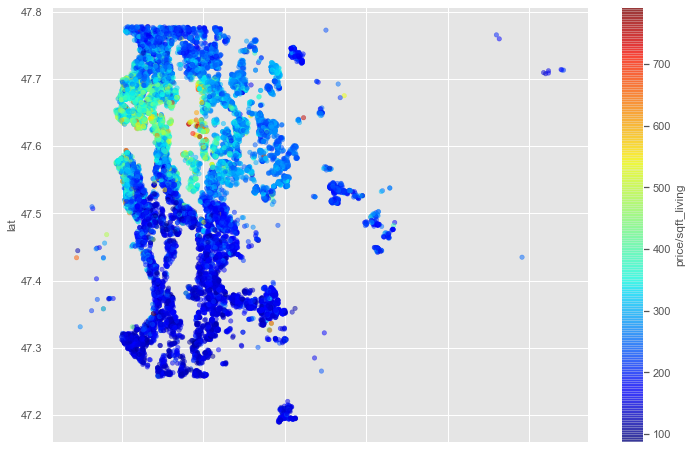

In [55]:
# Map of data using latitude and longitude
kc_base.plot.scatter('long', 'lat', c = 'price/sqft_living', alpha = 0.5,  figsize = (12, 8), cmap = 'jet')
plt.savefig('Images/Price_SqftLiving_Map.png')

**If the buyer wants to make profit on the house, what are their best options?**

In [56]:
kc_base.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,lat,long,basement,year_built,year_renovated,mo_sold,area,price/sqft_living
0,221900,3,1180,5650,0,0,3,7,47.5112,-122.257,0,1950,0,10,4,188.050847
1,538000,3,2570,7242,0,0,3,7,47.7210,-122.319,1,1950,10,12,1,209.338521
2,180000,2,770,10000,0,0,3,6,47.7379,-122.233,0,1930,0,2,2,233.766234
3,604000,4,1960,5000,0,0,5,7,47.5208,-122.393,1,1960,0,12,1,308.163265
4,510000,3,1680,8080,0,0,3,8,47.6168,-122.045,0,1980,0,2,7,303.571429


In [57]:
print(kc_base.groupby(['year_built'])['price/sqft_living'].mean())
print(kc_base.groupby(['year_renovated'])['price/sqft_living'].mean())

year_built
1900    353.569919
1910    331.267642
1920    343.058830
1930    311.108014
1940    301.064541
1950    263.309498
1960    224.044713
1970    222.213377
1980    224.212725
1990    215.677611
2000    243.587301
2010    239.528982
Name: price/sqft_living, dtype: float64
year_renovated
0     256.807000
1            NaN
2            NaN
3            NaN
4     301.689986
5     316.293621
6     256.125930
7     254.521260
8     314.312538
9     280.525128
10    300.505488
11    305.083340
12    316.352602
Name: price/sqft_living, dtype: float64


In [58]:
# The average price/sqft_living for non-renovated properties from each decade
a = kc_base[kc_base['year_renovated'] == 0 ]
a.groupby(['year_built'])['price/sqft_living'].mean()

year_built
1900    355.094864
1910    334.044028
1920    346.598467
1930    316.288290
1940    302.018910
1950    261.558751
1960    223.057787
1970    221.705411
1980    223.939019
1990    215.607530
2000    243.587301
2010    239.528982
Name: price/sqft_living, dtype: float64

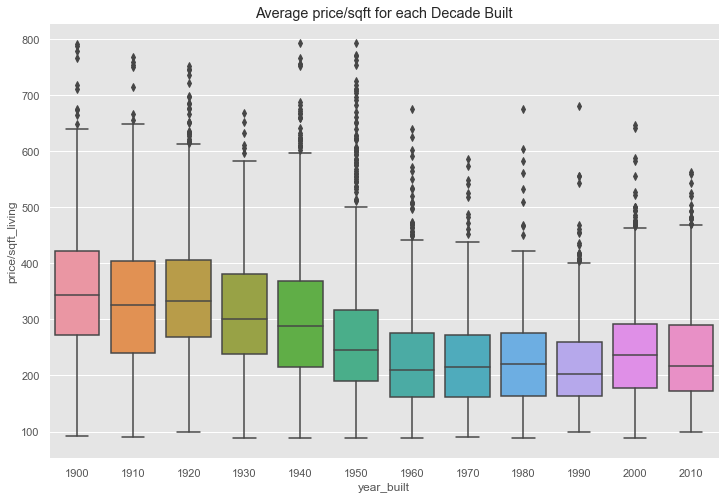

In [59]:
# Plot relationship of the year built to price/sqft
sns.boxplot(x = 'year_built', y = 'price/sqft_living', data = kc_base)
plt.title("Average price/sqft for each Decade Built")
plt.savefig('Images/Price_YearBuilt.png')

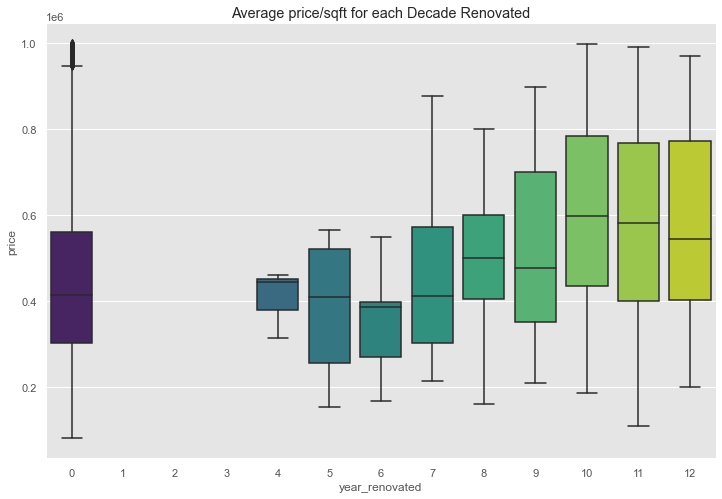

In [60]:
# Plot relationship of the year renovated to price/sqft
sns.boxplot(x = 'year_renovated', y = 'price', data = kc_base, palette = 'viridis')
plt.title("Average price/sqft for each Decade Renovated")
plt.savefig('Images/Price_YearRenovated.png')

Based on the data above, our recommendation for maximizing profit on a property is to buy an unrenovated house built in the 60's or 90's and renovate it. Recent renovation (within 15 years) has a very clear positive effect on price and it should be the same in this scenario.

### Question 3 - Recommendations for a Long Term Real Estate Developer

A real estate developer approaches the firm looking to expand into King County. What advice would you give them? How could they best realize a healthy profit with the insights this dataset offers? This developer is aimed at identifying cheaper opportunities and investing larger sums of money into long term gentrification.

What areas and properties can we identify that would satisfy those criteria?

**Where should they aim to focus their construction?**

In [61]:
# Check where they could maximize the amount of land they can buy
kc_base['price/sqft_lot'] = kc_base['price'] / kc_base['sqft_lot']

# Create lists with average prices
price_lot_by_area_median = kc_base.groupby(['area'])['price/sqft_lot'].median()
price_lot_by_area_mean = kc_base.groupby(['area'])['price/sqft_lot'].mean()

# Create dict of price / sqft
area_dict = {"price_lot_by_area_median": price_lot_by_area_median, 
             "price_lot_by_area_mean": price_lot_by_area_mean, 
             "price_liv_by_area_median": price_liv_by_area_median,
             "price_liv_by_area_mean": price_liv_by_area_mean}

# Create new df
df = pd.DataFrame(area_dict, index = [1,2,3,4,5,6,7,8,9])

# Compare price/sqft_lot with price/sqft_living
df['ratio_lot_liv_mean'] = df['price_liv_by_area_mean'] / df['price_lot_by_area_mean']
df['ratio_lot_liv_median'] = df['price_liv_by_area_median'] / df['price_lot_by_area_median']
df

,price_lot_by_area_median,price_lot_by_area_mean,price_liv_by_area_median,price_liv_by_area_mean,ratio_lot_liv_mean,ratio_lot_liv_median
1,107.500000,144.409659,307.526882,320.003806,2.215945,2.860715
2,62.254849,76.719980,263.431455,269.938159,3.518486,4.231501
3,63.814475,70.979756,263.576976,275.161145,3.876614,4.130363
4,37.638889,42.369733,163.085106,170.111376,4.014927,4.332888
5,32.379795,37.756297,180.046057,192.939046,5.110116,5.560445
6,32.641493,36.974642,146.302383,149.425252,4.041290,4.482098
7,84.683521,108.760570,257.209839,257.441253,2.367046,3.037307
8,42.298077,47.672374,163.551402,166.536414,3.493353,3.866639
9,75.605182,70.226352,208.478261,213.665620,3.042528,2.757460


In [62]:
kc_base["ratio_liv_lot_mean"] = kc_base["price/sqft_living"] / kc_base["price/sqft_lot"]

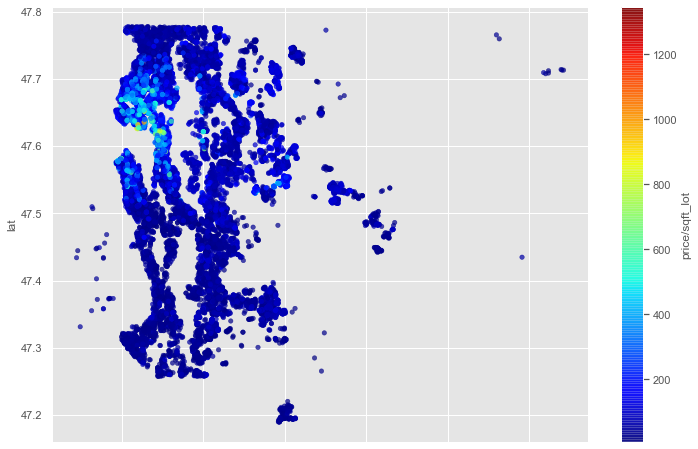

In [63]:
kc_base.plot.scatter('long', 'lat', c = 'price/sqft_lot', alpha = 0.7,  figsize = (12, 8), cmap = 'jet')

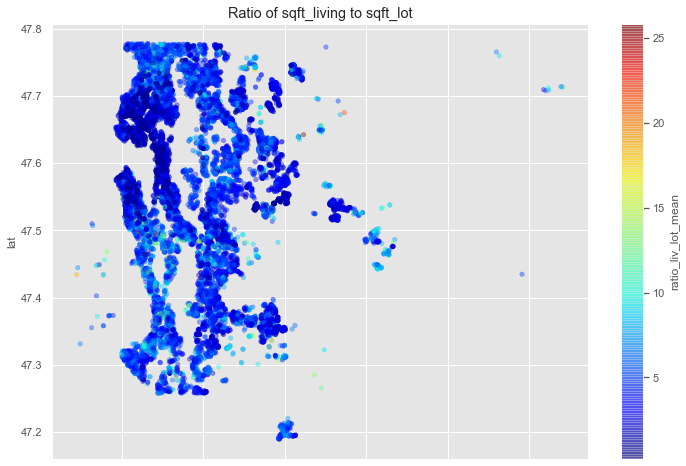

In [64]:
# Plot ratio of price/sqft_living to price?sqft_lot by area
kc_base.plot.scatter('long', 'lat', c = 'ratio_liv_lot_mean', alpha = 0.4,  figsize = (12, 8), cmap = 'jet')
plt.title("Ratio of sqft_living to sqft_lot")
plt.savefig('Images/Ratio_sqft_lot.png')

The takeaway from this is that real estate developers should focus on areas where they can maximize the ratio of the price, they can charge for living space created on the most amount of lottage. Areas 1 (central Seattle) generate among the worst returns on ratio of sqft_lot to sqft_living. The real estate developer should focus their efforts on the following areas (Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island) as they can acquire land very cheaply relative to what they can charge for the living space built on it. 

**How should they approach construction?**

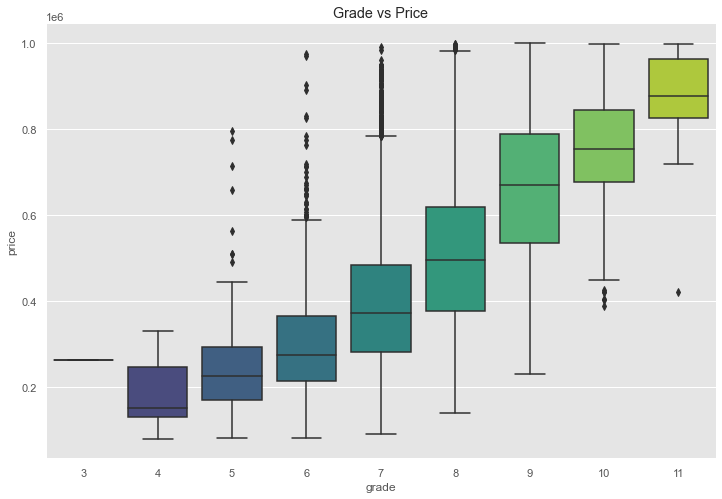

In [65]:
# Plot relationship of the year renovated to price/sqft
sns.boxplot(x = 'grade', y = 'price', data = kc_base, palette = 'viridis')
plt.title("Grade vs Price")
plt.savefig('Images/Grade_Price.png')

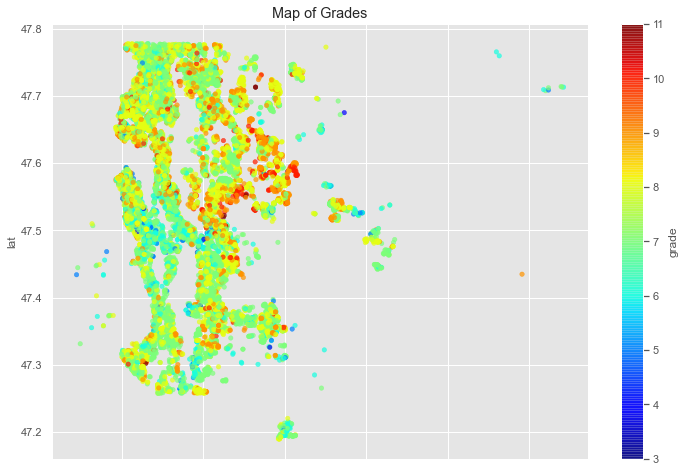

In [66]:
# Map of Grades using latitude and longitude
kc_base.plot.scatter('long', 'lat', c = 'grade', alpha = 0.7,  figsize = (12, 8), cmap = 'jet')
plt.title("Map of Grades")
plt.savefig('Images/Grade_Price_Map.png')

As clearly identified above in Question 1 and multiple models, Grade is one of the highest indicators of a property's price. If a real estate developer is working on new projects, one of their main priorities should be to achieve as high a Grade as possible for their property. 
